In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
oecd_dataPath='/content/drive/MyDrive/Machine_Learning_Book_Dataset/OECD.csv'
##Load the data
oecd_bil=pd.read_csv(oecd_dataPath,thousands=',')
oecd_bil
gdp_dataPath='/content/drive/MyDrive/Machine_Learning_Book_Dataset/GDP.csv'
gdp_per_capita=pd.read_csv(gdp_dataPath,thousands=',',delimiter='\t',encoding='latin1',na_values='n/a')
gdp_per_capita


,"Country ,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019"
0,"Aruba,ABW,24101.10943,25870.75594,26533.3439,2..."
1,"Afghanistan,AFG,,,,,,,,,,,,,839.4858861,888.15..."
2,"Angola,AGO,3089.683369,3120.356148,2908.160798..."
3,"Albania,ALB,2549.473022,1909.114038,1823.30767..."
4,"Arab World,ARB,6808.206995,6872.273195,7255.32..."
...,...
255,"Kosovo,XKX,,,,,,,,,,,3688.088054,4782.379635,4..."
256,"Yemen, Rep.,YEM,2223.028771,2325.263661,2443.9..."
257,"South Africa,ZAF,6424.502215,6414.057923,6261...."
258,"Zambia,ZMB,1517.926292,1528.781247,1499.340446..."


Country Statistics DataFrame:
         Country  GDP per capita  Life satisfaction
0  United States           62641                6.9
1         Canada           48352                7.4
2        Germany           51267                7.0
3         France           43659                6.5
4      Australia           51692                7.3


Number of samples: 30
Feature shape: (30, 1)
Target shape: (30, 1)


<Figure size 1000x600 with 0 Axes>

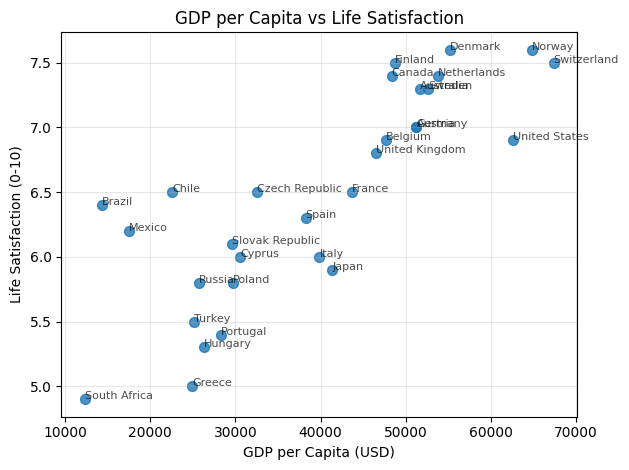


Model intercept: 4.7593
Model coefficient: 0.000043
R-squared score: 0.6719

Predictions vs Actual:


TypeError: 'float' object is not subscriptable

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Function to prepare country statistics
def prepare_country_stats(oecd_bli, gdp_per_capita):
    """
    Prepare and merge OECD Better Life Index and GDP per capita data

    Parameters:
    oecd_bli: DataFrame with OECD Better Life Index data
    gdp_per_capita: DataFrame with GDP per capita data

    Returns:
    DataFrame with merged and cleaned data
    """
    # Filter for Life satisfaction indicator in OECD BLI data
    # Assuming oecd_bli has columns: ["Country", "Indicator", "Value"]
    oecd_bli = oecd_bli[oecd_bli["Indicator"] == "Life satisfaction"]

    # Merge datasets on Country
    # Assuming both datasets have a "Country" column
    country_stats = pd.merge(oecd_bli, gdp_per_capita, on="Country", how="inner")

    # Rename columns for clarity
    # Assuming gdp_per_capita has "Value" column representing GDP per capita
    country_stats.rename(columns={
        "Value_x": "Life satisfaction",
        "Value_y": "GDP per capita"
    }, inplace=True)

    # Drop unnecessary columns if they exist
    columns_to_keep = ["Country", "GDP per capita", "Life satisfaction"]
    country_stats = country_stats[columns_to_keep]

    # Remove any rows with missing values
    country_stats = country_stats.dropna()

    return country_stats

# Example data creation (you would replace this with actual data loading)
# Creating sample data for demonstration
def create_sample_data():
    """Create sample data for testing"""
    # Sample OECD Better Life Index data
    countries = ["United States", "Canada", "Germany", "France", "Australia",
                 "United Kingdom", "Japan", "Switzerland", "Sweden", "Norway",
                 "Netherlands", "Denmark", "Finland", "Belgium", "Austria",
                 "Spain", "Italy", "Czech Republic", "Poland", "Slovak Republic",
                 "Hungary", "Portugal", "Greece", "Turkey", "Mexico", "Chile",
                 "Brazil", "Russia", "South Africa", "Cyprus"]

    # Life satisfaction scores (scale 0-10)
    life_satisfaction = [6.9, 7.4, 7.0, 6.5, 7.3, 6.8, 5.9, 7.5, 7.3, 7.6,
                         7.4, 7.6, 7.5, 6.9, 7.0, 6.3, 6.0, 6.5, 5.8, 6.1,
                         5.3, 5.4, 5.0, 5.5, 6.2, 6.5, 6.4, 5.8, 4.9, 6.0]

    # GDP per capita in USD
    gdp_values = [62641, 48352, 51267, 43659, 51692, 46510, 41366, 67394,
                  52677, 64857, 53835, 55235, 48775, 47724, 51267, 38246,
                  39870, 32582, 29751, 29608, 26324, 28304, 24952, 25153,
                  17443, 22587, 14293, 25739, 12294, 30570]

    # Create DataFrames
    oecd_bli_data = pd.DataFrame({
        "Country": countries,
        "Indicator": "Life satisfaction",
        "Value": life_satisfaction
    })

    gdp_data = pd.DataFrame({
        "Country": countries,
        "Value": gdp_values
    })

    return oecd_bli_data, gdp_data

# Main execution
if __name__ == "__main__":
    # Create or load your data
    # Replace with actual data loading code
    oecd_bli, gdp_per_capita = create_sample_data()

    # Prepare the country statistics
    country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

    print("Country Statistics DataFrame:")
    print(country_stats.head())
    print("\n" + "="*50 + "\n")

    # Prepare features and target
    X = np.c_[country_stats['GDP per capita']]
    y = np.c_[country_stats['Life satisfaction']]

    print(f"Number of samples: {len(X)}")
    print(f"Feature shape: {X.shape}")
    print(f"Target shape: {y.shape}")

    # Visualize the data
    plt.figure(figsize=(10, 6))
    country_stats.plot(
        kind='scatter',
        x="GDP per capita",
        y="Life satisfaction",
        alpha=0.8,
        s=50
    )

    # Add country labels
    for i, txt in enumerate(country_stats['Country']):
        plt.annotate(txt, (country_stats['GDP per capita'].iloc[i],
                          country_stats['Life satisfaction'].iloc[i]),
                    fontsize=8, alpha=0.7)

    plt.title('GDP per Capita vs Life Satisfaction')
    plt.xlabel('GDP per Capita (USD)')
    plt.ylabel('Life Satisfaction (0-10)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Select and train a model
    model = LinearRegression()
    model.fit(X, y)

    # Print model coefficients
    print(f"\nModel intercept: {model.intercept_[0]:.4f}")
    print(f"Model coefficient: {model.coef_[0][0]:.6f}")
    print(f"R-squared score: {model.score(X, y):.4f}")

    # Make predictions for all countries
    print("\nPredictions vs Actual:")
    print("="*50)
    predictions = model.predict(X)
    country_stats['Predicted'] = predictions

    for idx, row in country_stats.iterrows():
        print(f"{row['Country']:20} | GDP: ${row['GDP per capita']:8,.0f} | "
              f"Actual: {row['Life satisfaction']:.2f} | "
              f"Predicted: {row['Predicted'][0]:.2f}")

    # Make a prediction for Cyprus
    cyprus_gdp = 22587  # Cyprus GDP per capita
    X_new = [[cyprus_gdp]]
    cyprus_prediction = model.predict(X_new)

    print("\n" + "="*50)
    print(f"Prediction for Cyprus (GDP per capita: ${cyprus_gdp}):")
    print(f"Predicted Life Satisfaction: {cyprus_prediction[0][0]:.2f}")

    # Visualize the prediction
    plt.figure(figsize=(10, 6))
    plt.scatter(country_stats['GDP per capita'],
                country_stats['Life satisfaction'],
                alpha=0.7, s=50, label='Actual Data')

    # Plot regression line
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred_range = model.predict(X_range)
    plt.plot(X_range, y_pred_range, 'r-', linewidth=2, label='Regression Line')

    # Highlight Cyprus prediction
    plt.scatter(cyprus_gdp, cyprus_prediction[0][0],
                color='red', s=200, marker='*',
                label=f'Cyprus Prediction: {cyprus_prediction[0][0]:.2f}')

    plt.title('GDP per Capita vs Life Satisfaction with Linear Regression')
    plt.xlabel('GDP per Capita (USD)')
    plt.ylabel('Life Satisfaction (0-10)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Optional: Try different model
    print("\n" + "="*50)
    print("Optional: Trying K-Nearest Neighbors model for comparison")
    from sklearn.neighbors import KNeighborsRegressor

    knn_model = KNeighborsRegressor(n_neighbors=3)
    knn_model.fit(X, y.ravel())
    knn_prediction = knn_model.predict(X_new)
    print(f"KNN Prediction for Cyprus: {knn_prediction[0]:.2f}")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

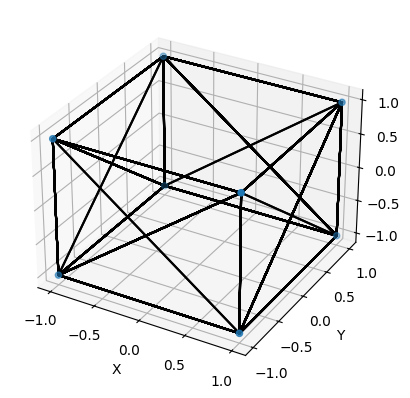

In [8]:
##Define the coordinates of the cube vertics
vertics=np.array([
    [-1,-1,-1],
    [1,-1,-1],
    [1,1,-1],
    [-1,1,-1],
    [-1,-1,1],
    [1,-1,1],
    [1,1,1],
    [-1,1,1]
])



##Define the edge
edges=np.array([
    [0,1],
    [1,2],
    [2,3],
    [3,0],
    [4,5],
    [5,6],
    [6,7],
    [7,4],
    [0,4],
    [1,5],
    [2,6],
    [3,7]
])


fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

##Plot the cube vertice
ax.scatter(
    vertics[:,0],
    vertics[:,1],
    vertics[:,2]
)
##Plot the cube  edges
for edge in edges:
  ax.plot(
      vertics[edge,0],
      vertics[edge,1],
      vertics[edges,2],
      color='black'
  )

##set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

##show the plot
plt.show()

In [10]:
##3D cube composed of vertices (points)
#Transelate the cube by(1,1,1)
vertices_translated=vertics+np.array([1,1,1])
vertices_translated

array([[0, 0, 0],
       [2, 0, 0],
       [2, 2, 0],
       [0, 2, 0],
       [0, 0, 2],
       [2, 0, 2],
       [2, 2, 2],
       [0, 2, 2]])

In [11]:
vertices_scaled=vertics*2
vertices_scaled

array([[-2, -2, -2],
       [ 2, -2, -2],
       [ 2,  2, -2],
       [-2,  2, -2],
       [-2, -2,  2],
       [ 2, -2,  2],
       [ 2,  2,  2],
       [-2,  2,  2]])

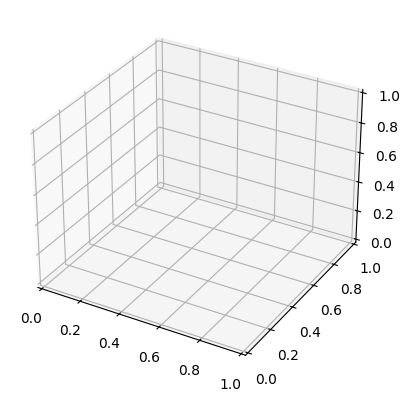

In [15]:
#create a figure and axes object
fig=plt.figure()

ax=fig.add_subplot(111,projection='3d')

In [18]:
##Plot the origial cube vertics
ax.scatter(
    vertics[:,0],
    vertics[:,1],
    vertics[:,2],
    label='Original Cube'
    )
#plot the translated vertics
ax.scatter(
    vertices_translated[:,0],
    vertices_translated[:,1],
    vertices_translated[:,2],
    label='Translated Cube'
)


#plot the scaled cube vertics
ax.scatter(
    vertices_scaled[:,0],
    vertices_scaled[:,1],
    vertices_scaled[:,2],
    label='Scaled cube vertics'
)


##set the axis lables
ax.set_xlabel("X")
ax.set_label("Y")
ax.set_label("Y")

plt.show()